In [1]:
import numpy as np
import arrow 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
from datetime import datetime
import matplotlib
import matplotlib.dates as dates
import pandas as pd

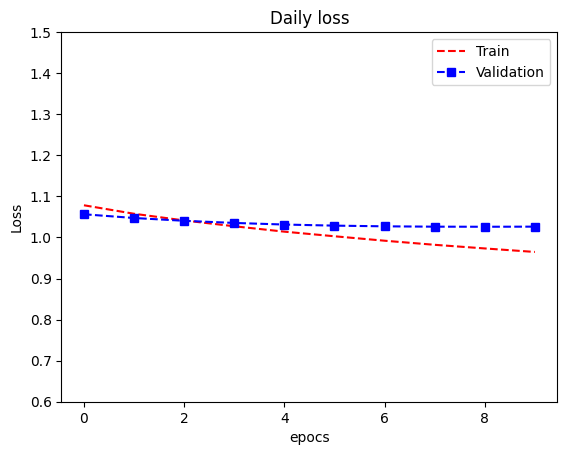

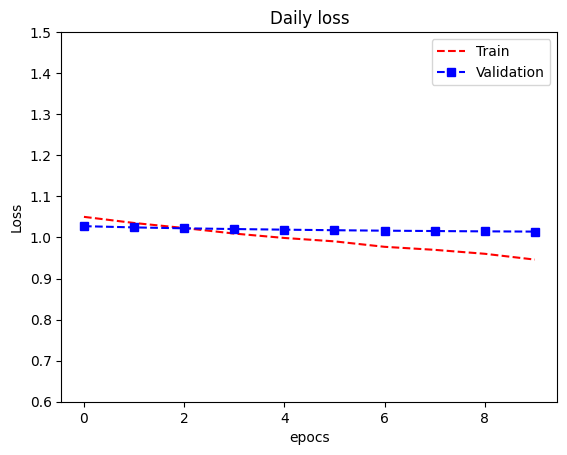

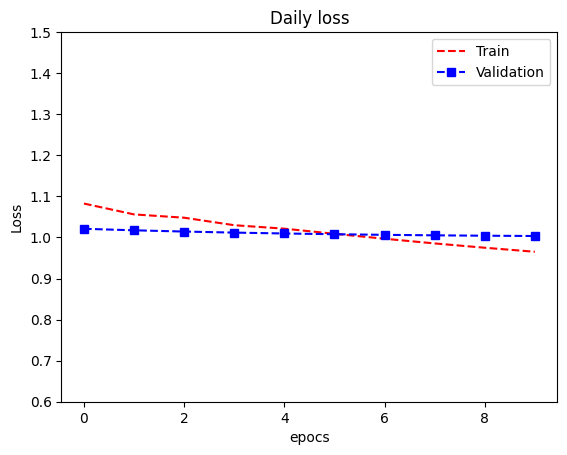

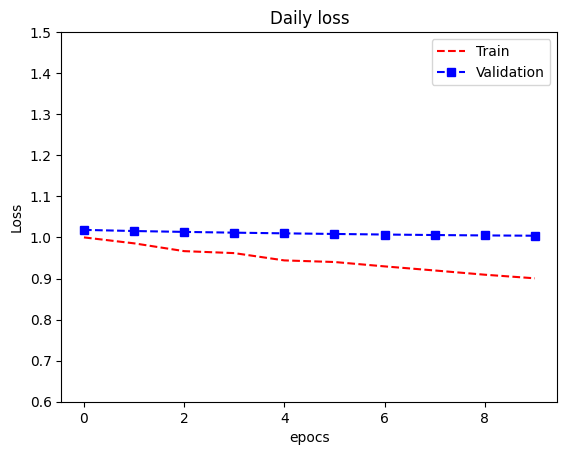

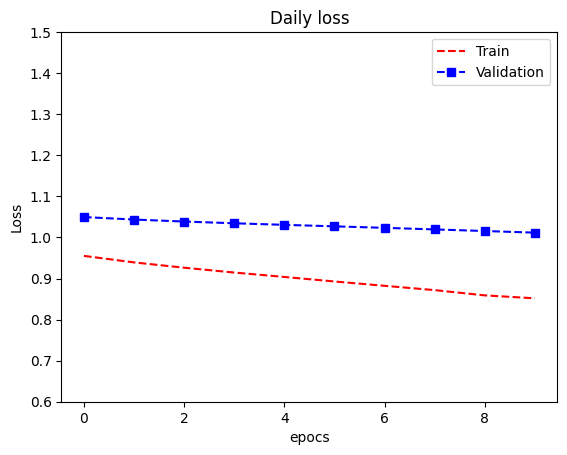

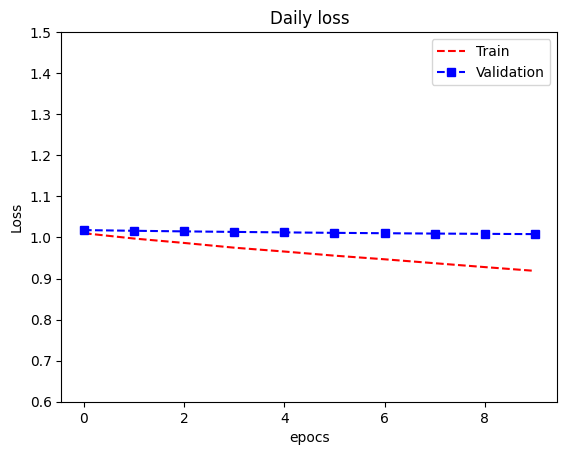

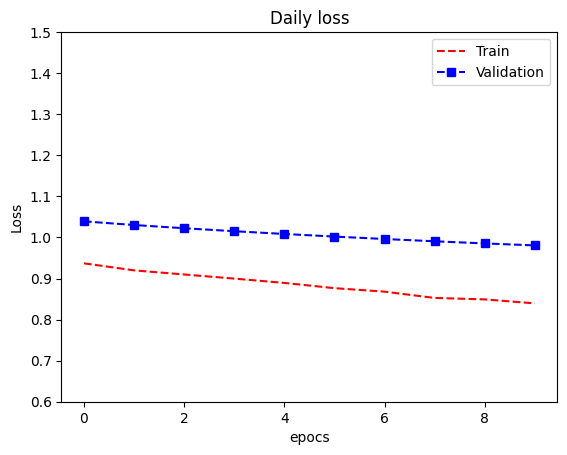

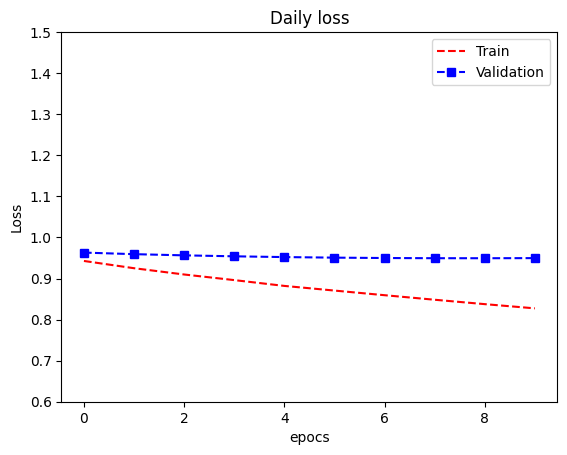

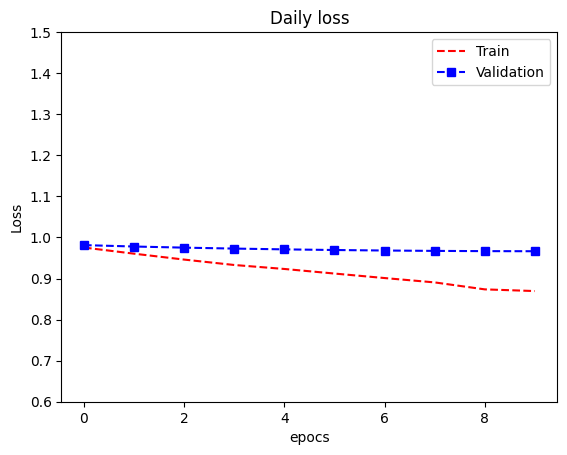

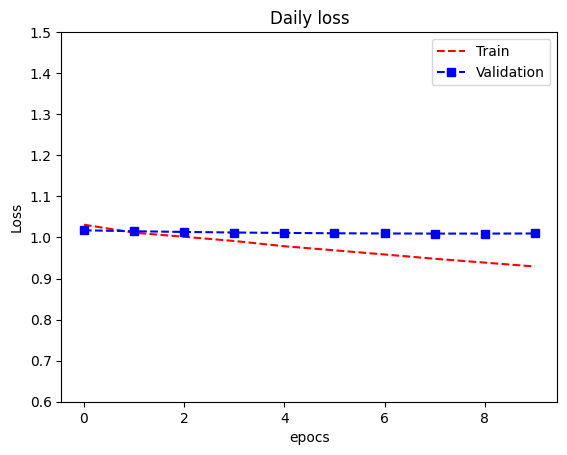

In [2]:
for i in range(10):
    df_epoc = pd.read_csv(r'epochs'+str(i)+'.csv')
    epoc=list(df_epoc['0'])
    epocs=epoc[:10]
    
    df_val = pd.read_csv(r'val_loss_exp'+str(i)+'.csv')
    val=list(df_val['0'])
    vals=val[:10]
    
    df_train = pd.read_csv(r'train_loss_exp'+str(i)+'.csv')
    train=list(df_train['0'])
    train=train[:10]
    plt.plot(epocs, train, 'r--',label = "Train")
    plt.plot(epocs, vals, 'bs--',label = "Validation")
    plt.xlabel('epocs')
    plt.title('Daily loss')
    plt.ylim([0.6, 1.5])
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    
    
    

In [3]:
predict = np.load('predict.npy')
label = np.load('label.npy')
time = np.load('time.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'predict.npy'

In [3]:
time.shape

(544, 169)

In [4]:
time_val = []
for i in range(time.shape[0]):
    for j in range(time.shape[1]):
        t = arrow.get(time[i][j]).format()
        time_val.append(t)
time_val = np.array(time_val)
len(time_val)

91936

In [5]:
time_val = time_val.reshape(544, 169)
time_val

array([['2020-03-31 22:00:00+00:00', '2020-04-01 01:00:00+00:00',
        '2020-04-01 04:00:00+00:00', ..., '2020-04-21 16:00:00+00:00',
        '2020-04-21 19:00:00+00:00', '2020-04-21 22:00:00+00:00'],
       ['2020-04-01 01:00:00+00:00', '2020-04-01 04:00:00+00:00',
        '2020-04-01 07:00:00+00:00', ..., '2020-04-21 19:00:00+00:00',
        '2020-04-21 22:00:00+00:00', '2020-04-22 01:00:00+00:00'],
       ['2020-04-01 04:00:00+00:00', '2020-04-01 07:00:00+00:00',
        '2020-04-01 10:00:00+00:00', ..., '2020-04-21 22:00:00+00:00',
        '2020-04-22 01:00:00+00:00', '2020-04-22 04:00:00+00:00'],
       ...,
       ['2020-06-07 13:00:00+00:00', '2020-06-07 16:00:00+00:00',
        '2020-06-07 19:00:00+00:00', ..., '2020-06-28 07:00:00+00:00',
        '2020-06-28 10:00:00+00:00', '2020-06-28 13:00:00+00:00'],
       ['2020-06-07 16:00:00+00:00', '2020-06-07 19:00:00+00:00',
        '2020-06-07 22:00:00+00:00', ..., '2020-06-28 10:00:00+00:00',
        '2020-06-28 13:00:00+00:00'

In [6]:
test= np.arange(0,time_val.shape[0],384)

In [7]:
true = []
pred = []
t_step = []
for i in range(time_val.shape[0]):
    true.append(label[i][int(1)][1][0])
#     print(label[i][int(1)][1][0])
    pred.append(predict[i][int(1)][1][0])
    t_step.append(time_val[i][0][:-6])

In [66]:
labels=[]
for i in test:
    labels.append(t_step[i][:-8])

In [71]:
df = pd.DataFrame(
    {'Time': t_step,
     'Prediction': pred,
     'Actual': true
    })

In [80]:
df['Time']

0      2021-06-30 23:00:00
1      2021-07-01 02:00:00
2      2021-07-01 05:00:00
3      2021-07-01 08:00:00
4      2021-07-01 11:00:00
               ...        
1435   2021-12-27 08:00:00
1436   2021-12-27 11:00:00
1437   2021-12-27 14:00:00
1438   2021-12-27 17:00:00
1439   2021-12-27 20:00:00
Name: Time, Length: 1440, dtype: datetime64[ns]

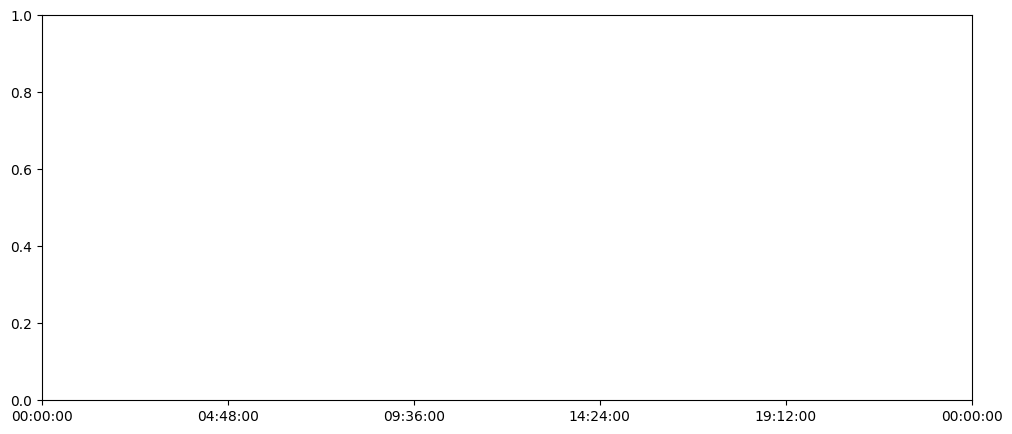

In [84]:
formatter = matplotlib.dates.DateFormatter('%H:%M:%S')

figure = plt.figure(figsize=(12,5))
axes = figure.add_subplot(1, 1, 1)
axes.xaxis.set_major_formatter(formatter)

In [88]:
df['Time'] = pd.to_datetime(df['Time'])

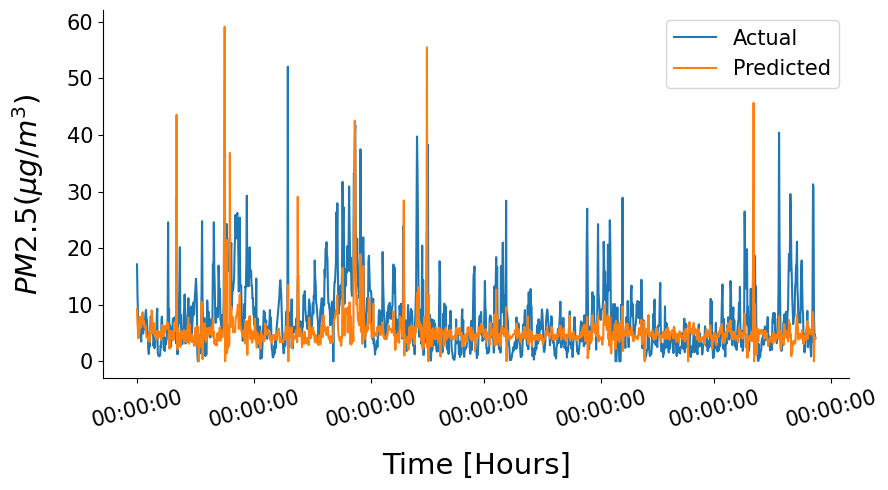

In [89]:
# formatter = matplotlib.dates.DateFormatter('%Y-%m-%d')

figure = plt.figure(figsize=(9,5))
axes = figure.add_subplot(1, 1, 1)
axes.xaxis.set_major_formatter(formatter)
plt.setp(axes.get_xticklabels(), rotation=15)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.plot(df['Time'], df['Actual'], label="Actual")
axes.plot(df['Time'], df['Prediction'], label="Predicted")
plt.ylabel("$PM2.5  (\mu g/m^{3})$", fontsize=21, labelpad=15)
plt.xlabel('Time [Hours]', fontsize=21, labelpad=15)
plt.xticks(fontsize=15)
# plt.xticks(rotation=-45)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Temperature.pdf')
plt.show()

In [19]:

def plot(hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours)][4][0])
        pred.append(predict[i][int(hours)][4][0])
        t_step.append(time_val[i][0][:-6])
    plt.figure(figsize=(5,3))
    fig1 = plt.plot(t_step,true)
    fig2 =plt.plot(t_step,pred)
    test= np.arange(0,time_val.shape[0],384)
    labels=[]
    for i in test:
        labels.append(t_step[i][:-8])
    plt.xticks(test,labels,rotation = 60)
    plt.ylabel("$PM2.5 (\mu g/m^{3})$")
    plt.legend(['Actual PM2.5', 'Predicted PM2.5'])
    plt.title('Model Prediction plot for ' +str(hours)+' hour forecast')
    plt.figure()
    #plt.savefig('saved.jpeg')  

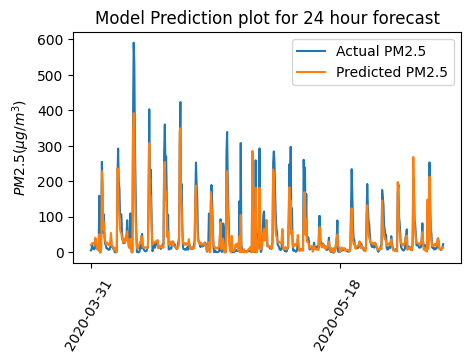

<Figure size 640x480 with 0 Axes>

In [21]:
hours = [24]
for i in hours:
    plot(i)

In [44]:
len(time_val)

1440

In [46]:
time_val.shape[0]

1440

In [47]:

def plot(hours):
    true = []
    pred = []
    t_step = []
    for i in range(1,time_val.shape[0]):
        value = label[i][int(hours/3)][1][0]- label[i-1][int(hours/3)][1][0]
        true.append(value)
        pred_value=predict[i][int(hours/3)][1][0]-predict[i-1][int(hours/3)][1][0]
        pred.append(pred_value)
        t_step.append(time_val[i][0][:-6])
    plt.figure(figsize=(9,5))
    fig1 = plt.plot(t_step,true)
    fig2 =plt.plot(t_step,pred)
    test= np.arange(0,time_val.shape[0],384)
    labels=[]
    for i in test:
        labels.append(t_step[i][:-8])
    plt.xticks(test,labels,rotation = 60)
    plt.ylabel("$PM2.5 (\mu g/m^{3})$")
    plt.legend(['Actual PM2.5', 'Predicted PM2.5'])
    plt.title('Model Prediction plot for ' +str(hours)+' hour forecast')
    plt.figure()
    #plt.savefig('saved.jpeg') 

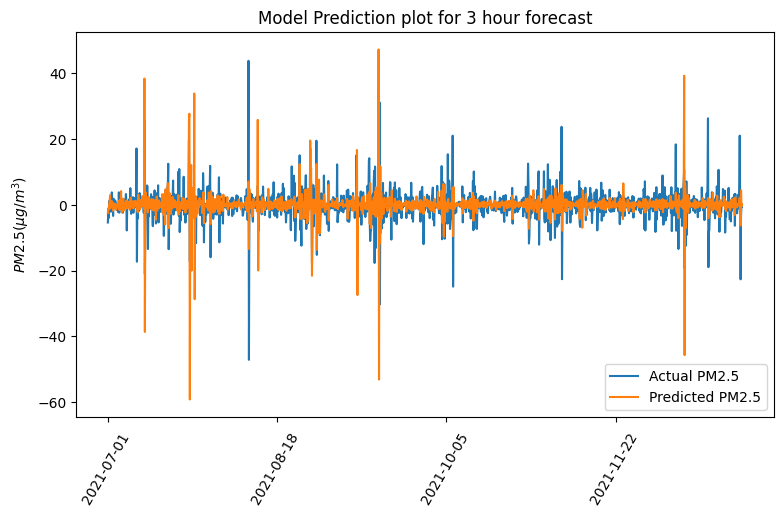

<Figure size 640x480 with 0 Axes>

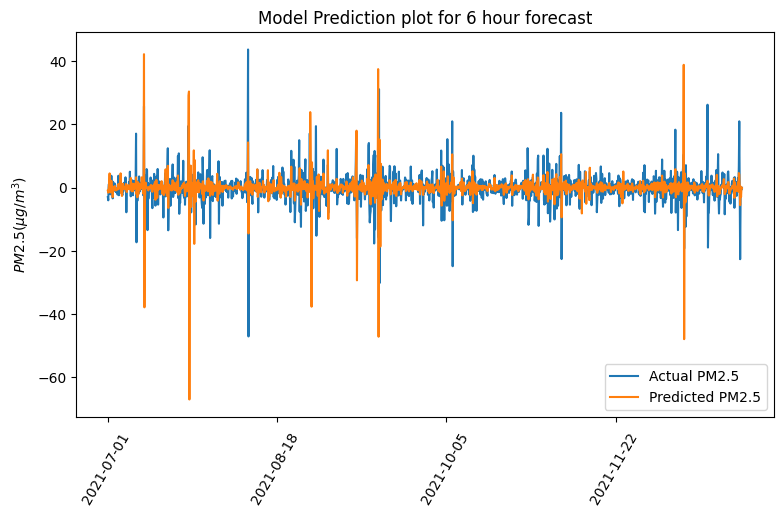

<Figure size 640x480 with 0 Axes>

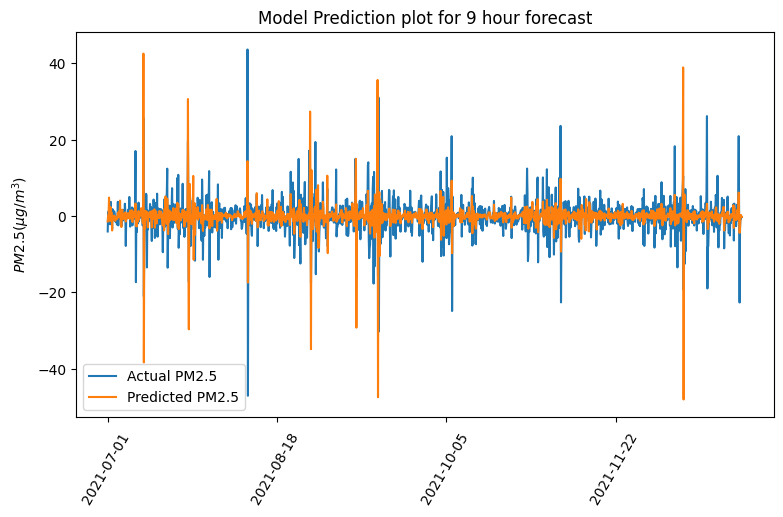

<Figure size 640x480 with 0 Axes>

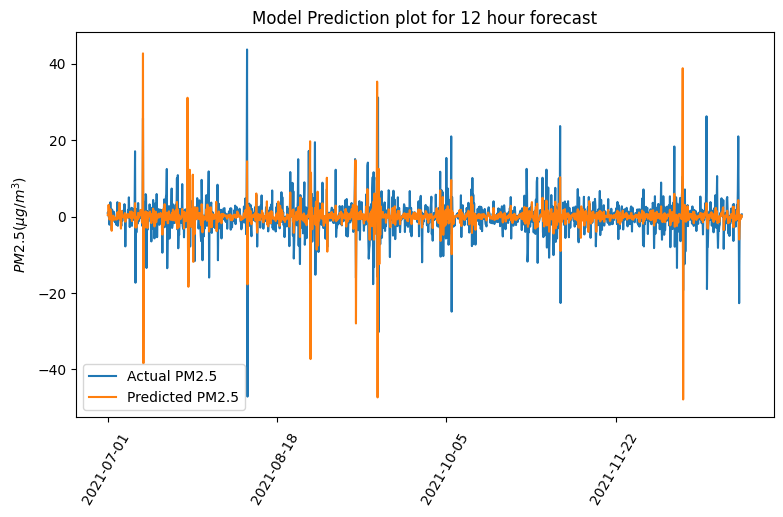

<Figure size 640x480 with 0 Axes>

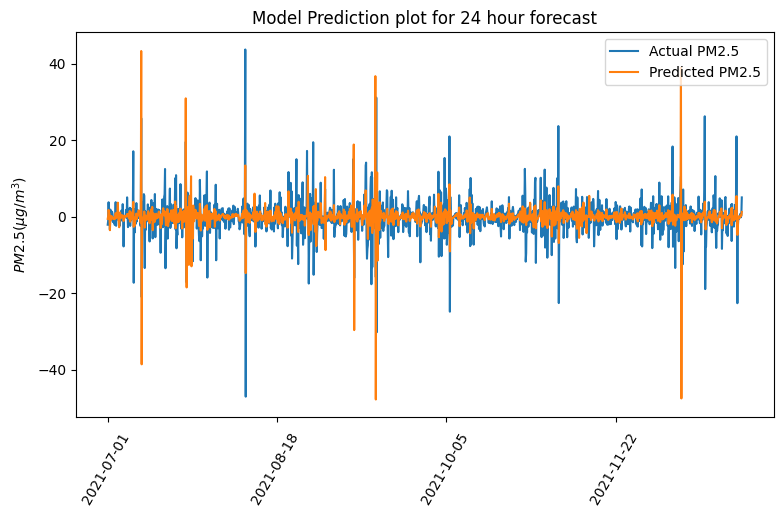

<Figure size 640x480 with 0 Axes>

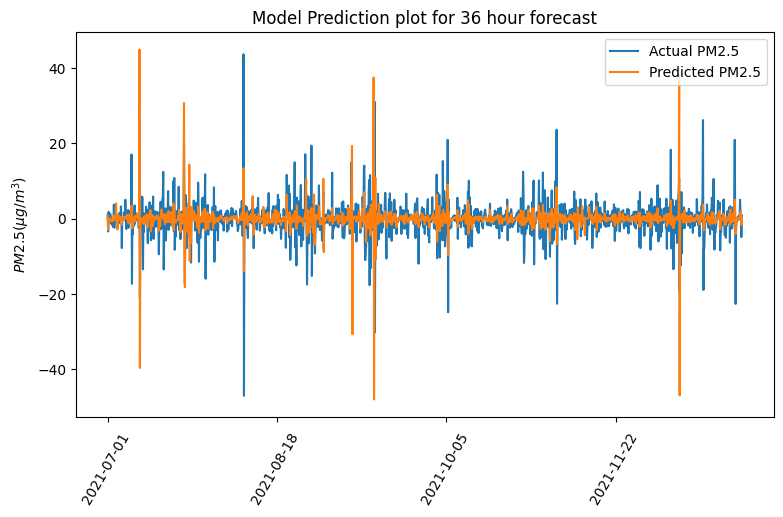

<Figure size 640x480 with 0 Axes>

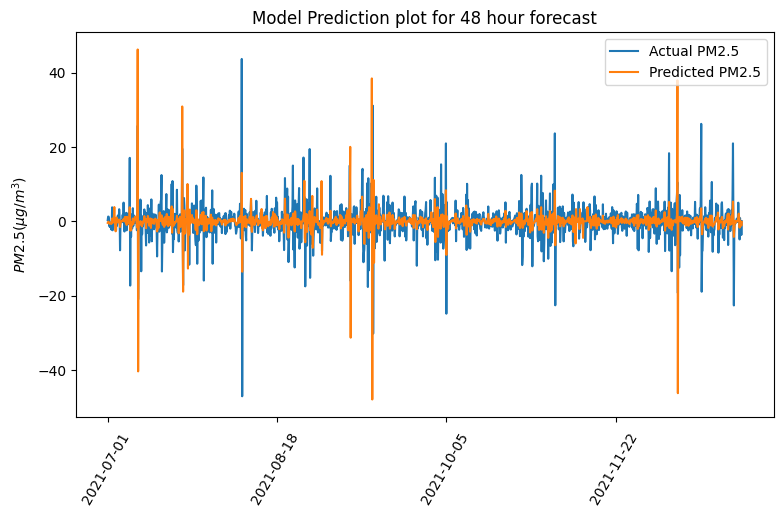

<Figure size 640x480 with 0 Axes>

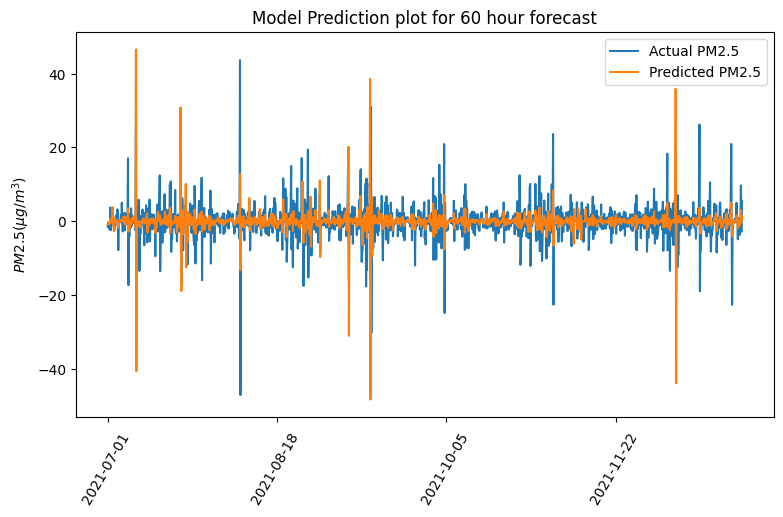

<Figure size 640x480 with 0 Axes>

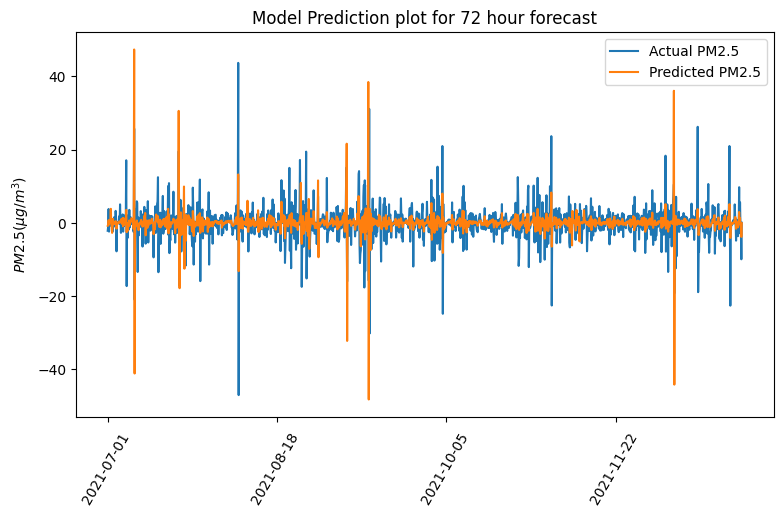

<Figure size 640x480 with 0 Axes>

In [48]:
hours = [3,6,9,12,24,36,48,60,72]
for i in hours:
    plot(i)

In [29]:
df

,Date Time,PM2.5,Pred_PM2.5,Time
0,2021-06-30 23:00:00,6.800,8.944959,2021-06-30 23:00:00
1,2021-07-01 02:00:00,4.660,8.333764,2021-07-01 02:00:00
2,2021-07-01 05:00:00,3.471,8.396873,2021-07-01 05:00:00
3,2021-07-01 08:00:00,7.203,10.130584,2021-07-01 08:00:00
4,2021-07-01 11:00:00,7.300,11.029313,2021-07-01 11:00:00
...,...,...,...,...
1435,2021-12-27 08:00:00,4.239,4.325820,2021-12-27 08:00:00
1436,2021-12-27 11:00:00,4.958,4.597226,2021-12-27 11:00:00
1437,2021-12-27 14:00:00,4.767,4.720623,2021-12-27 14:00:00
1438,2021-12-27 17:00:00,5.141,4.995195,2021-12-27 17:00:00


<Figure size 5000x2000 with 0 Axes>

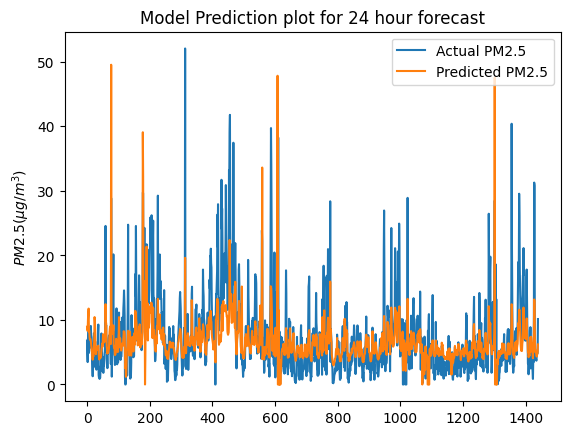

<Figure size 5000x2000 with 0 Axes>

In [31]:
#formatter = matplotlib.dates.DateFormatter('%H:%M')

#figure = plt.figure(figsize=(9,5))
#axes = figure.add_subplot(1, 1, 1)
#axes.xaxis.set_major_formatter(formatter)
#plt.setp(axes.get_xticklabels(), rotation=24)
# axes.spines['top'].set_visible(False)
# axes.spines['right'].set_visible(False)

# fig1 = plt.plot(data_week3.index,np.array(data_week3['PM2.5']))
plt.plot(np.array(df['PM2.5']))
# fig2 = plt.plot(data_week3.index,np.array(data_week3['Pred_PM2.5']))
plt.plot(np.array(df['Pred_PM2.5']))
#plt.xticks([0,4,9,14,19,24,29,34 ])#,rotation = 20)
plt.ylabel("$PM2.5  (\mu g/m^{3})$")

plt.legend(['Actual PM2.5', 'Predicted PM2.5'])
plt.title('Model Prediction plot for ' +str(24)+' hour forecast')
plt.figure(figsize=(50, 20))
#plt.figsize(20,10)
    #plt.savefig('saved.jpeg') 

In [27]:
#true = []
#pred = []
#t_step = []
#for i in range(time_val.shape[0]):
    #true.append(label[i][int(24/3)][4][0])
    #pred.append(predict[i][int(24/3)][4][0])
    #t_step.append(time_val[i][0][:-6])
    
#print(true)
a = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in df['Date Time']]
x = matplotlib.dates.date2num(a)
formatter = matplotlib.dates.DateFormatter('%H:%M:%S')
  
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)
  
axes.xaxis.set_major_formatter(formatter)
plt.setp(axes.get_xticklabels(), rotation = 15)
  
axes.plot(x, np.array(df['PM2.5']))
axes.plot(x, np.array(df['Pred_PM2.5']))
plt.show()

TypeError: strptime() argument 1 must be str, not Timestamp

In [135]:
#df['Date Time'] = pd.to_datetime(df['Date Time'], errors='coerce')
#df = df.set_index('Date Time')
#df.head(3)

,Date Time,PM2.5,Pred_PM2.5
0,2020-12-31 23:00:00,1.122,0.000000
1,2021-01-01 02:00:00,1.019,0.000000
2,2021-01-01 05:00:00,0.858,0.386763


In [136]:
#origin=df['Date Time']
a = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in origin]
a

TypeError: strptime() argument 1 must be str, not Timestamp

In [126]:
#data_week3 = df.resample('D').mean()
#data_week3['Pred_PM2.5'].shape

In [129]:
#plt.figure(figsize=(6, 3))
dates=df.index
formatter = matplotlib.dates.DateFormatter('%H:%M')
df

,PM2.5,Pred_PM2.5
Date Time,,
2020-12-31 23:00:00,1.122000,0.000000
2021-01-01 02:00:00,1.019000,0.000000
2021-01-01 05:00:00,0.858000,0.386763
2021-01-01 08:00:00,1.291000,3.119847
2021-01-01 11:00:00,1.714000,0.000000
...,...,...
2021-08-24 08:00:00,44.653999,56.037750
2021-08-24 11:00:00,55.562000,67.170380
2021-08-24 14:00:00,0.000000,8.710087


In [132]:
df.index
a = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in df.index]
a

TypeError: strptime() argument 1 must be str, not Timestamp

<Figure size 5000x2000 with 0 Axes>

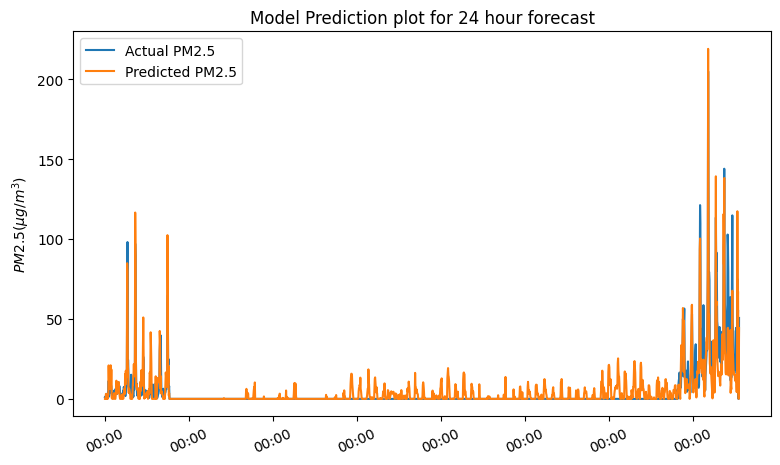

<Figure size 5000x2000 with 0 Axes>

In [130]:

figure = plt.figure(figsize=(9,5))
axes = figure.add_subplot(1, 1, 1)
axes.xaxis.set_major_formatter(formatter)
plt.setp(axes.get_xticklabels(), rotation=24)
# axes.spines['top'].set_visible(False)
# axes.spines['right'].set_visible(False)

# fig1 = plt.plot(data_week3.index,np.array(data_week3['PM2.5']))
axes.plot(np.array(df['PM2.5']))
# fig2 = plt.plot(data_week3.index,np.array(data_week3['Pred_PM2.5']))
axes.plot(np.array(df['Pred_PM2.5']))
#plt.xticks([0,4,9,14,19,24,29,34 ])#,rotation = 20)
plt.ylabel("$PM2.5  (\mu g/m^{3})$")

plt.legend(['Actual PM2.5', 'Predicted PM2.5'])
plt.title('Model Prediction plot for ' +str(24)+' hour forecast')
plt.figure(figsize=(50, 20))
#plt.figsize(20,10)
    #plt.savefig('saved.jpeg') 

In [43]:

def plot(hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours/3)][0][0])
        pred.append(predict[i][int(hours/3)][0][0])
        t_step.append(time_val[i][0][:-6])
    
    fig1 = plt.plot(t_step,true)
    fig2 =plt.plot(t_step,pred)
    plt.xticks([10,100,300,600,927],rotation = 60)
    plt.ylabel("$PM2.5 (\mu g/m^{3})$")
    plt.legend(['Actual PM2.5', 'Predicted PM2.5'])
    plt.title('Model Prediction plot for ' +str(hours)+' hour forecast')
    plt.figure()
    #plt.savefig('saved.jpeg')  

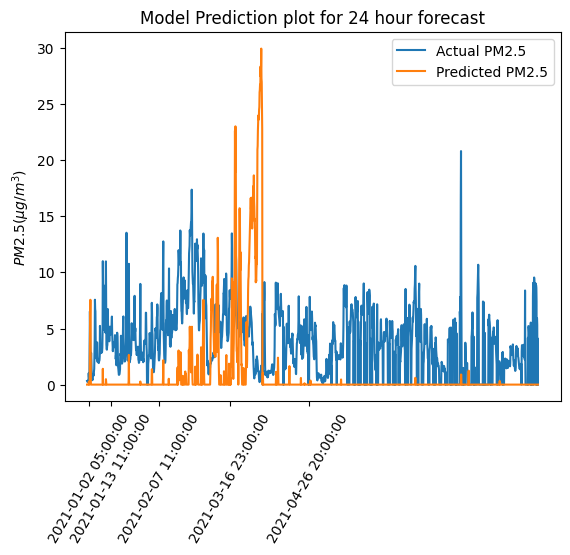

<Figure size 640x480 with 0 Axes>

In [44]:
hours = [24]#[3,6,9,12,24,36,48,60,72]
for i in hours:
    plot(i)

In [9]:
#Calculate the RMSE
def RMSE(hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours)][0][0])
        pred.append(predict[i][int(hours)][0][0])
        t_step.append(time_val[i][0])
    sum = 0
    
    for i in range(len(pred)):
        difference = true[i]-pred[i]
        diff_sqrd = difference**2
        sum += diff_sqrd

    rmse = np.sqrt(sum/len(pred))

    true = np.array(true)
    pred = np.array(pred)
    t_step = np.array(t_step)

    #plt.plot(t_step,true)
    #plt.plot(t_step,pred)
    #plt.xticks([0,47,95,143,191],rotation = 90)
    #plt.figure()  
    
    return rmse

In [10]:
#Calculate the RMSE
def RMSE1(hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours)][1][0])
        pred.append(predict[i][int(hours)][1][0])
        t_step.append(time_val[i][0])
    sum = 0
    
    for i in range(len(pred)):
        difference = true[i]-pred[i]
        diff_sqrd = difference**2
        sum += diff_sqrd

    rmse = np.sqrt(sum/len(pred))

    true = np.array(true)
    pred = np.array(pred)
    t_step = np.array(t_step)

    #plt.plot(t_step,true)
    #plt.plot(t_step,pred)
    #plt.xticks([0,47,95,143,191],rotation = 90)
    #plt.figure()  
    
    return rmse

In [11]:
#Calculate the RMSE
def RMSE2(hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours)][2][0])
        pred.append(predict[i][int(hours)][2][0])
        t_step.append(time_val[i][0])
    sum = 0
    
    for i in range(len(pred)):
        difference = true[i]-pred[i]
        diff_sqrd = difference**2
        sum += diff_sqrd

    rmse = np.sqrt(sum/len(pred))

    true = np.array(true)
    pred = np.array(pred)
    t_step = np.array(t_step)

    #plt.plot(t_step,true)
    #plt.plot(t_step,pred)
    #plt.xticks([0,47,95,143,191],rotation = 90)
    #plt.figure()  
    
    return rmse

In [12]:
#Calculate the RMSE
def RMSE3(hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours)][3][0])
        pred.append(predict[i][int(hours)][3][0])
        t_step.append(time_val[i][0])
    sum = 0
    
    for i in range(len(pred)):
        difference = true[i]-pred[i]
        diff_sqrd = difference**2
        sum += diff_sqrd

    rmse = np.sqrt(sum/len(pred))

    true = np.array(true)
    pred = np.array(pred)
    t_step = np.array(t_step)

    #plt.plot(t_step,true)
    #plt.plot(t_step,pred)
    #plt.xticks([0,47,95,143,191],rotation = 90)
    #plt.figure()  
    
    return rmse

In [13]:
#Calculate the RMSE
def RMSE4(hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours)][4][0])
        pred.append(predict[i][int(hours)][4][0])
        t_step.append(time_val[i][0])
    sum = 0
    
    for i in range(len(pred)):
        difference = true[i]-pred[i]
        diff_sqrd = difference**2
        sum += diff_sqrd

    rmse = np.sqrt(sum/len(pred))

    true = np.array(true)
    pred = np.array(pred)
    t_step = np.array(t_step)

    #plt.plot(t_step,true)
    #plt.plot(t_step,pred)
    #plt.xticks([0,47,95,143,191],rotation = 90)
    #plt.figure()  
    
    return rmse

In [14]:
hours = [3,6,9,12,24]#,36,48,60,72]

In [15]:
dilokong = []
mokopane=[]
capricorn=[]
thabazimbi=[]
lephalale=[]
for i in hours:
    dilokong.append(RMSE(i))
    mokopane.append(RMSE1(i))
    capricorn.append(RMSE2(i))
    thabazimbi.append(RMSE3(i))
    lephalale.append(RMSE4(i))

In [16]:
rmse_values = pd.DataFrame({'hours':hours,'dilokong':dilokong ,'mokopane':mokopane,'capricorn':capricorn
                           ,'thabazimbi':thabazimbi,'lephalale=':lephalale})

In [17]:
rmse_values

,hours,dilokong,mokopane,capricorn,thabazimbi,lephalale=
0,3,2.983077,4.694555,3.476048,3.399532,17.286929
1,6,2.658705,4.647146,3.233104,3.310868,16.797019
2,9,2.494705,4.621794,3.194161,3.225488,16.786568
3,12,2.372924,4.628328,3.168549,3.109756,16.843829
4,24,2.137050,4.600769,3.289348,2.845864,16.659072


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


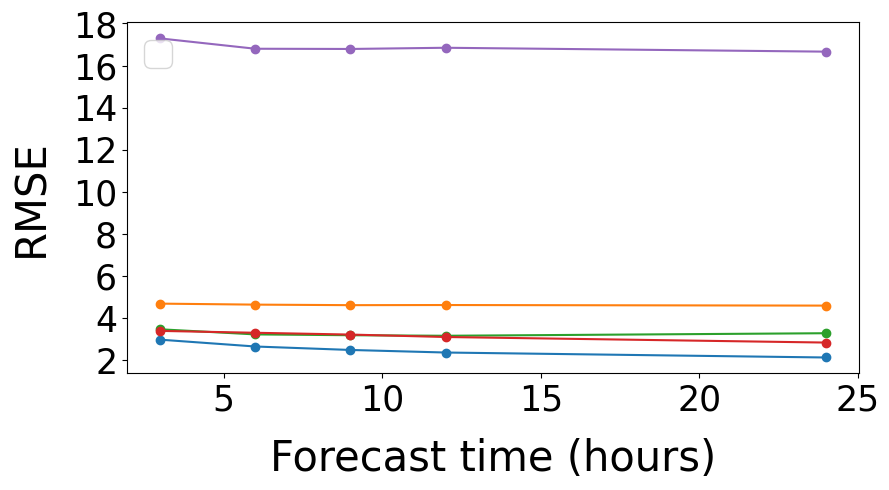

In [18]:
rmse_values.to_excel("PM25_GNN RMSE.xlsx")

fig,ax= plt.subplots(figsize=(9,5))
plt.plot(rmse_values['hours'],rmse_values['dilokong'],'-o')
plt.plot(rmse_values['hours'],rmse_values['mokopane'],'-o')
plt.plot(rmse_values['hours'],rmse_values['capricorn'],'-o')
plt.plot(rmse_values['hours'],rmse_values['thabazimbi'],'-o')
plt.plot(rmse_values['hours'],rmse_values['lephalale='],'-o')
plt.ylabel('RMSE',fontsize=30,labelpad=15)
plt.xlabel('Forecast time (hours)',fontsize=30,labelpad=15)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout()
plt.show()

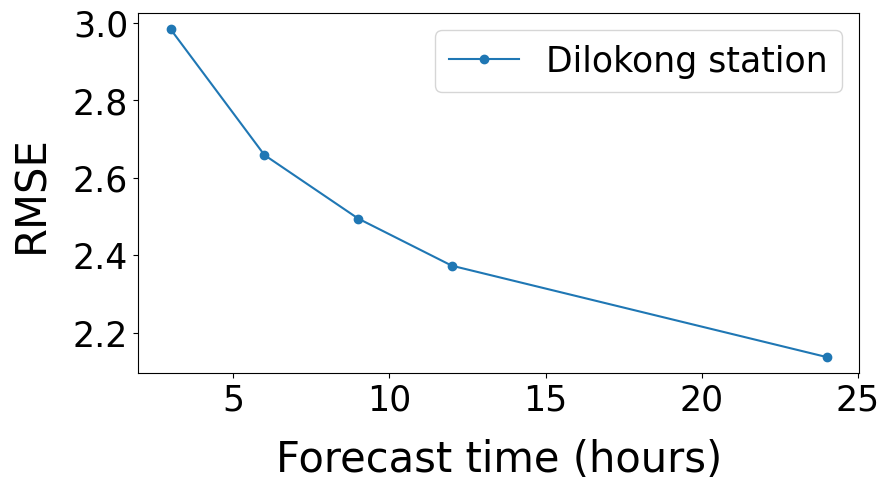

In [20]:
rmse_values.to_excel("PM25_GNN RMSE.xlsx")

fig,ax= plt.subplots(figsize=(9,5))
plt.plot(rmse_values['hours'],rmse_values['dilokong'],'-o')

plt.ylabel('RMSE',fontsize=30,labelpad=15)
plt.xlabel('Forecast time (hours)',fontsize=30,labelpad=15)
plt.legend(['Dilokong station'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['Dilokong station'],fontsize=25)
plt.tight_layout()
plt.show()

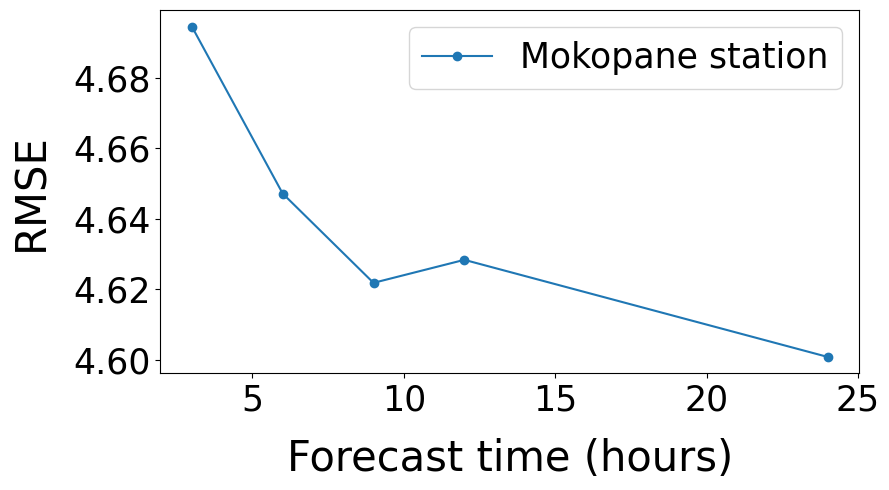

In [21]:
rmse_values.to_excel("PM25_GNN RMSE.xlsx")

fig,ax= plt.subplots(figsize=(9,5))

plt.plot(rmse_values['hours'],rmse_values['mokopane'],'-o')

plt.ylabel('RMSE',fontsize=30,labelpad=15)
plt.xlabel('Forecast time (hours)',fontsize=30,labelpad=15)
plt.legend(['Mokopane station'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['Mokopane station'],fontsize=25)
plt.tight_layout()
plt.show()

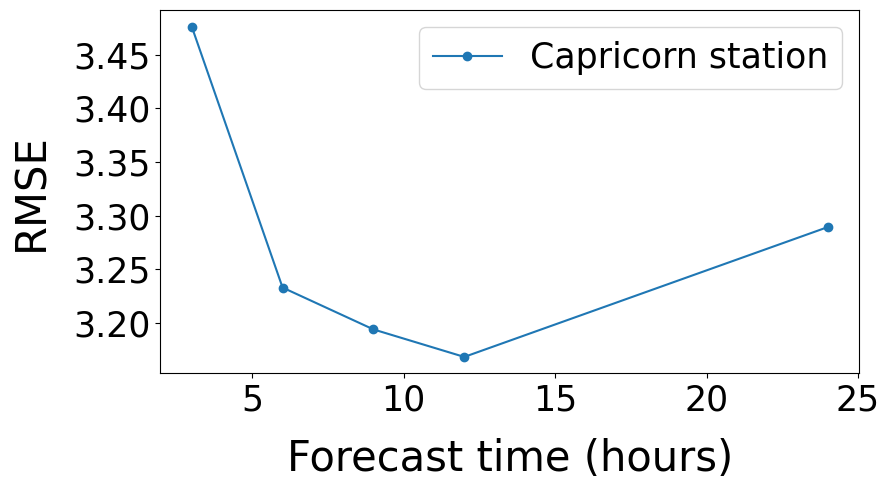

In [22]:
rmse_values.to_excel("PM25_GNN RMSE.xlsx")

fig,ax= plt.subplots(figsize=(9,5))

plt.plot(rmse_values['hours'],rmse_values['capricorn'],'-o')

plt.ylabel('RMSE',fontsize=30,labelpad=15)
plt.xlabel('Forecast time (hours)',fontsize=30,labelpad=15)
plt.legend(['Capricorn station'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['Capricorn station'],fontsize=25)
plt.tight_layout()
plt.show()

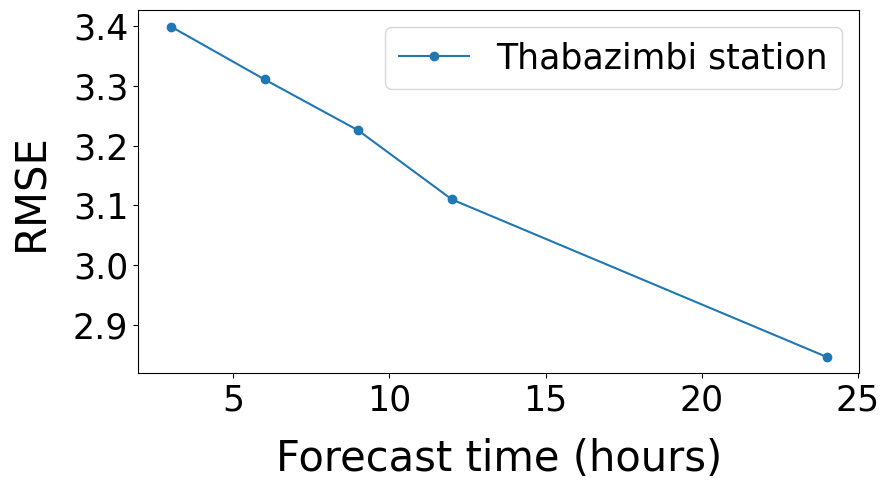

In [23]:
rmse_values.to_excel("PM25_GNN RMSE.xlsx")

fig,ax= plt.subplots(figsize=(9,5))

plt.plot(rmse_values['hours'],rmse_values['thabazimbi'],'-o')

plt.ylabel('RMSE',fontsize=30,labelpad=15)
plt.xlabel('Forecast time (hours)',fontsize=30,labelpad=15)
plt.legend(['Thabazimbi station'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['Thabazimbi station'],fontsize=25)
plt.tight_layout()
plt.show()

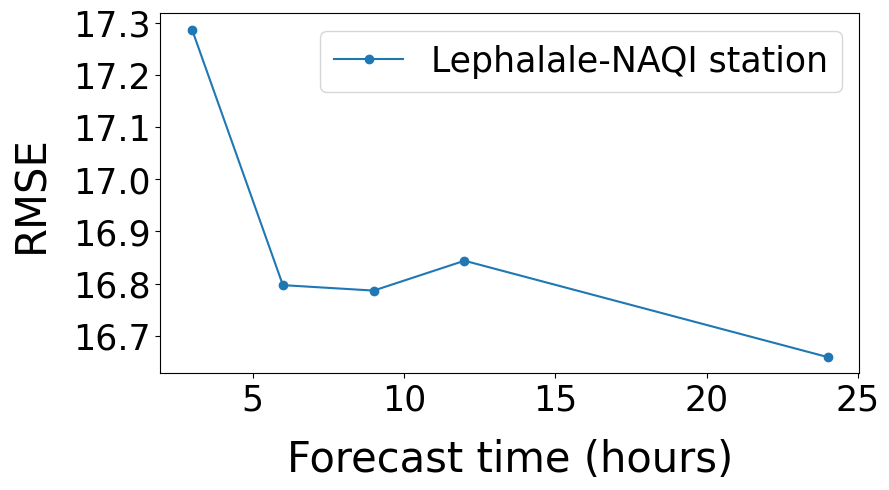

In [24]:
rmse_values.to_excel("PM25_GNN RMSE.xlsx")

fig,ax= plt.subplots(figsize=(9,5))

plt.plot(rmse_values['hours'],rmse_values['lephalale='],'-o')

plt.ylabel('RMSE',fontsize=30,labelpad=15)
plt.xlabel('Forecast time (hours)',fontsize=30,labelpad=15)
plt.legend(['Lephalale-NAQI station'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(['Lephalale-NAQI station'],fontsize=25)
plt.tight_layout()
plt.show()

In [99]:
#Calculate the RMSE
def RMSE(station,hours):
    true = []
    pred = []
    t_step = []
    for i in range(time_val.shape[0]):
        true.append(label[i][int(hours)][station][0])
        pred.append(predict[i][int(hours)][station][0])
        t_step.append(time_val[i][0])
    sum = 0
    
    for i in range(len(pred)):
        difference = true[i]-pred[i]
        diff_sqrd = difference**2
        sum += diff_sqrd

    rmse = np.sqrt(sum/len(pred))

    true = np.array(true)
    pred = np.array(pred)
    t_step = np.array(t_step)

    #plt.plot(t_step,true)
    #plt.plot(t_step,pred)
    #plt.xticks([0,47,95,143,191],rotation = 90)
    #plt.figure()  
    
    return rmse

index=[1,2,3,4,5]
station=['Dikolong','Mokopane','Capricorn','Thabazimbi','Laphalale-NAQI']
per_station=[]
hours=[3,6,9,12,24]
for i in index:
    rmse_vals=[]
    for i in hours:
        rmse_vals.append(RMSE(j,i))
    per_station.append(rmse_vals)

df=pd.DataFrame()
df['hours']=hours
for i in range(len(station)):
    df[station[i]]= per_station[i]
df

IndexError: index 24 is out of bounds for axis 0 with size 5